# Introduction

This task focuses on predicting whether a bank customer is likely to churn (leave the bank).
We'll use the Churn Modelling dataset, perform data cleaning, encode categorical features,
train classification models, and analyze feature importance.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Dataset Overview

In [3]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)

Shape: (10000, 14)

Data types:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


# Data Preprocessing

In [4]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# Feature Encoding

In [5]:
# Label encode binary categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# One-hot encode 'Geography'
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Feature Scaling

This is optional but helpful

In [6]:
scaler = StandardScaler()
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Train-Test Split

In [7]:
X = df.drop(columns='Exited')
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

## Logistic Regression

In [8]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

## Random Forest Classifier

In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Model Evaluation

## Logistic Regression

In [10]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, lr_preds))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.8115
Confusion Matrix (Logistic Regression):
 [[1544   63]
 [ 314   79]]
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## Random Forest

In [11]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, rf_preds))
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.866
Confusion Matrix (Random Forest):
 [[1552   55]
 [ 213  180]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



# Feature Importance (Random Forest)

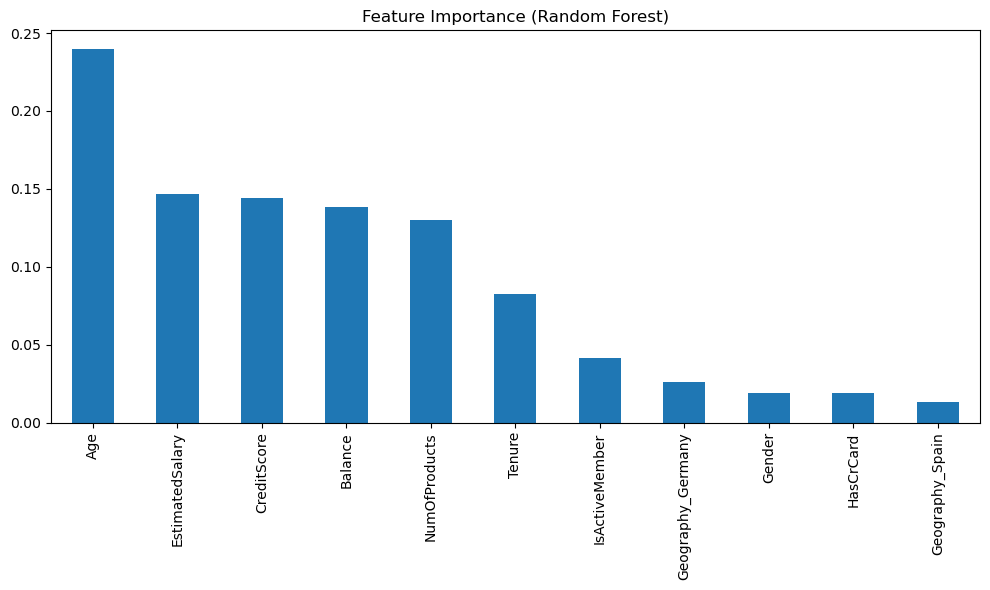

In [12]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

# Conclusion

- The Random Forest model achieved an accuracy of 86%, better than Logistic Regression which got 81%.
- Key features affecting churn include Age, Balance, Credit Score, and Geography.
- Label encoding and one-hot encoding helped prepare categorical data effectively.
- Standardization improved model convergence and performance.

This task provided practical experience in churn modeling using classification and feature analysis.